<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 6</b></center>    
<pre>    

In [ ]:
Doshi Hensi Vipulbhai
23010101617

# import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Import diabetes.csv data ser using sklearn

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,Non Diabetic
764,2,122,70,27,0,36.8,0.340,27,Non Diabetic
765,5,121,72,23,112,26.2,0.245,30,Non Diabetic
766,1,126,60,0,0,30.1,0.349,47,Diabetic


# Check the distribution of the target

In [4]:
print(df['Outcome'].value_counts())

Outcome
Non Diabetic    500
Diabetic        268
Name: count, dtype: int64


# Replace zeros with NaN for specific columns

In [5]:
column_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[column_to_replace] = df[column_to_replace].replace(0,np.nan)

# Check for missing values

In [6]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Fill missing values with median

In [7]:
df.fillna(df.median(numeric_only=True), inplace=True)
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Visualize Distributions

In [8]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Convert Targer data into interger code

In [9]:
df['Outcome'] = df['Outcome'].map({"Diabetic":1,"Non Diabetic":0})

In [10]:
df['Outcome'] 

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Divide the data into input and output

In [11]:
x = df.iloc[::,:-1:]

In [12]:
y = df['Outcome']

# Splitting the dataset into the Training set and Test set

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Create Model

In [14]:
model = DecisionTreeClassifier()

# Fitting DecisionTreeClassifier   on dataset

In [15]:
t = model.fit(x_train,y_train)

# Display Decision Tree

[Text(0.5236149267399267, 0.9722222222222222, 'x[1] <= 144.5\ngini = 0.462\nsamples = 537\nvalue = [343, 194]'),
 Text(0.2552884615384615, 0.9166666666666666, 'x[7] <= 28.5\ngini = 0.368\nsamples = 412\nvalue = [312, 100]'),
 Text(0.3894516941391941, 0.9444444444444444, 'True  '),
 Text(0.11648351648351649, 0.8611111111111112, 'x[5] <= 30.45\ngini = 0.203\nsamples = 218\nvalue = [193, 25]'),
 Text(0.046886446886446886, 0.8055555555555556, 'x[0] <= 7.0\ngini = 0.039\nsamples = 100\nvalue = [98, 2]'),
 Text(0.035164835164835165, 0.75, 'x[4] <= 48.5\ngini = 0.02\nsamples = 99\nvalue = [98, 1]'),
 Text(0.023443223443223443, 0.6944444444444444, 'x[6] <= 0.63\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.011721611721611722, 0.6388888888888888, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.035164835164835165, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.046886446886446886, 0.6944444444444444, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.05

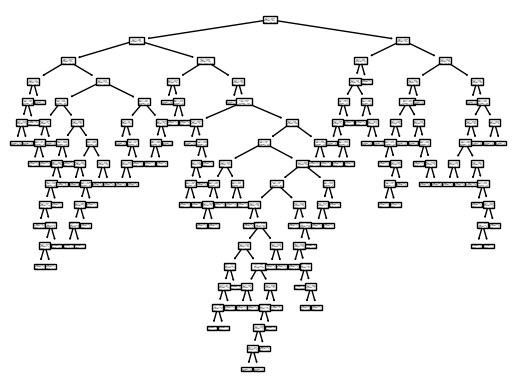

In [16]:
tree.plot_tree(t)

# Predict the x_test 

In [17]:
y_pred = model.predict(x_test)

# Display Training Accuracy

In [19]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, model.predict(x_train))

# Display Test Accuracy

In [20]:
accuracy_score(y_test,y_pred)

0.7575757575757576

# Confusion Matrix

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [22]:
cm = confusion_matrix(y_test,y_pred)

In [23]:
cm

array([[124,  33],
       [ 23,  51]], dtype=int64)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       157
           1       0.61      0.69      0.65        74

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231



# Save Model State

In [25]:
import pickle

In [26]:
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved to {filename}")

Model saved to model.pkl


# Load Model from Disk

In [30]:
filename = 'model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully!")

Model loaded successfully!
